<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MINI PROJECT 1 - Data Analysis and Visualization <br>
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="NEW_GL_Logo.png">
        </td>
    </tr>
</table>

Shafeenafarheen Jageerhussain

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Read the dataset 'pokemon.csv'.  

In [2]:
#Reading the dataset from the Pokemon.csv file and displaying the first 5 rows
df_pokemon = pd.read_csv("m")
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2.List the columns in the dataframe.  

In [3]:
#Displying the column names from the loaded dataset
print("Columns present in the Pokemon dataframe:",list(df_pokemon.columns))

Columns present in the Pokemon dataframe: ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


### 3.Drop the column '#'.     

In [4]:
#Dropping the column called "#" from the dataset
df_pokemon_droppedCols = df_pokemon.drop(columns='#', axis ='Columns')
print("Columns present in the Pokemon dataframe after dropping '#' column:",list(df_pokemon_droppedCols.columns))

Columns present in the Pokemon dataframe after dropping '#' column: ['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


### 4.Check if the dataset has null values.   

In [5]:
#Computing the sum of blank valus from each features from Pokemon dataset and printing them
df_pokemon_null_values = df_pokemon_droppedCols.isnull().sum()
print("No. of null values under each feature from the provided Pokemon dataset:\n",df_pokemon_null_values)

#Identifying the features with null values values
#Zipping their column indices and values, to convert them into a dictionary
df_pokemon_null_records = dict(zip(list(df_pokemon_null_values.index[df_pokemon_null_values > 0]),
                        list(df_pokemon_null_values.values[df_pokemon_null_values > 0])))

#Printing the final dictionary with the feature names that has null values
print("\nFeatures with null values, along with the count:",df_pokemon_null_records)

No. of null values under each feature from the provided Pokemon dataset:
 Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Features with null values, along with the count: {'Type 2': 386}


### 5.Drop the records with null values.

In [6]:
#Dropping the rows which has blanks from the Pokemon dataset
df_pokemon_no_null_values = df_pokemon_droppedCols.dropna()

#Computing the no. of rows before and after dropping the blank values from Pokemon dataset
print("No. of rows in the Pokemon datset:\n  a. after dropping the blank values:",df_pokemon_droppedCols.shape[0],
      "\n  b. after dropping the blank values:",df_pokemon_no_null_values.shape[0])

#Ensuring if the datset still has null values or not
df_pokemon_null_values2 = df_pokemon_no_null_values.isnull().sum()

#Printing the features with null valus, if any left still
print("\nColumns with null values, if any:",
      "None" if not list(filter(lambda l1: l1 if l1>0 else "",list(df_pokemon_null_values2))) 
      else list(df_pokemon_null_values2.index[df_pokemon_null_values2 > 0]))

No. of rows in the Pokemon datset:
  a. after dropping the blank values: 800 
  b. after dropping the blank values: 414

Columns with null values, if any: None


### 6. Find the most frequent type of pokemon in Type 1 and Type 2.  

In [7]:
#Assumption: The dataset without null values (i.e., 414 rows) are to be considered as an i/p for the below calculations

#Calculating the mode (or the highest no. of frequency) of values under the "Type 1" and "Type 2" features
df_pokemon_Type1_mode = df_pokemon_no_null_values["Type 1"].mode().values
df_pokemon_Type2_mode = df_pokemon_no_null_values["Type 2"].mode().values

#Printing the most frequent type of Pokemon in "Type 1" and "Type 2" features
print("Most frequent type of Pokemen in Type 1 is {} and Type 2 is {}".
      format(df_pokemon_Type1_mode,df_pokemon_Type2_mode))

Most frequent type of Pokemen in Type 1 is ['Water'] and Type 2 is ['Flying']


### 7. Find the mean defense value and attack value of the pokemons.  

In [8]:
#Assumption: The dataset without null values (i.e., 414 rows) are to be considered as an i/p for the below calculations

#Calculating the mean (or the avg.) of values under the "Defense" and "Attack" features
df_pokemon_Defence_mean = round(df_pokemon_no_null_values["Defense"].mean(),2)
df_pokemon_Attack_mean = round(df_pokemon_no_null_values["Attack"].mean(),2)

#Printing the mean defence and attack values of the Pokemon dataset
print("Mean Defence value of Pokemons is {0} and Attack value is {1}".
      format(df_pokemon_Defence_mean,df_pokemon_Attack_mean))

Mean Defence value of Pokemons is 79.68 and Attack value is 83.17


### 8. What is the maximum 'total' of the pokemons? List the pokemons with top 5 total. 

In [9]:
#Assumption: The dataset without null values (i.e., 414 rows) are to be considered as an i/p for the below calculations

#Identifying the max value of the feature "Total" and printing them
print("Maximum 'total' of the Pokemons:",max(df_pokemon_no_null_values["Total"]))

#Identifying the pokemons with top 5 highest totals, by sorting them in desc. order and printing them
df_pokemon_top5_total = df_pokemon_no_null_values.sort_values('Total', ascending=False).head()
print('\nPokemons with top 5 total:',dict(df_pokemon_top5_total[['Name','Total']].values))

Maximum 'total' of the Pokemons: 780

Pokemons with top 5 total: {'RayquazaMega Rayquaza': 780, 'MewtwoMega Mewtwo X': 780, 'GroudonPrimal Groudon': 770, 'GarchompMega Garchomp': 700, 'MetagrossMega Metagross': 700}


### 9.How skewed are the features 'Sp. Def' and 'Sp. Atk'? Write down your inference of the same.  

Mean, Median and Mode of 'Sp.Def' feature are 75.565, 75.0 and 31 and 'Sp.Atk' are 77.048, 70.0 and 23 respectively.

Skewness of 'Sp.Def' and 'Sp.Atk' are 0.765 and 0.653 respectively.

Upperbound Outliers that exist in 'Sp.Def' and 'Sp.Atk' features are [230] and [180] respectively.


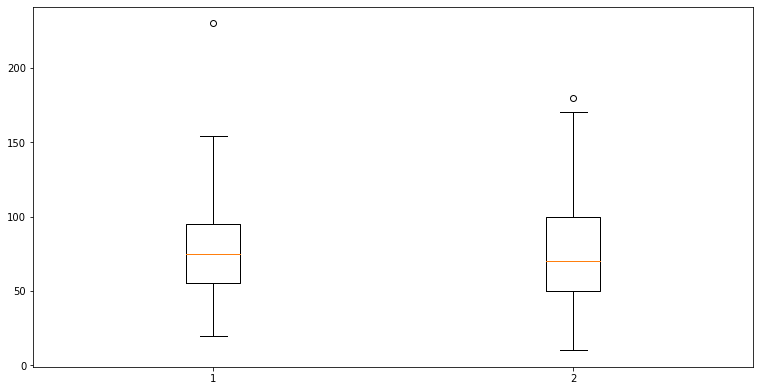

In [10]:
#Assumption: The dataset without null values (i.e., 414 rows) are to be considered as an i/p for the below calculations

#Calculating the mean, median and mode of the "Sp.Def" and "Sp.Atk" features
print("Mean, Median and Mode of 'Sp.Def' feature are {0}, {1} and {2} and 'Sp.Atk' are {3}, {4} and {5} respectively.".
      format(round(df_pokemon_no_null_values['Sp. Def'].mean(),3),
             df_pokemon_no_null_values['Sp. Def'].median(),
             df_pokemon_no_null_values['Sp. Def'].value_counts().tolist()[0],
             round(df_pokemon_no_null_values['Sp. Atk'].mean(),3),
             df_pokemon_no_null_values['Sp. Atk'].median(),
             df_pokemon_no_null_values['Sp. Atk'].value_counts().tolist()[0]))

#Calculating the skewness (or the data distribution) of the "Sp.Def" and "Sp.Atk" features
print("\nSkewness of 'Sp.Def' and 'Sp.Atk' are {0} and {1} respectively.".
      format(round(df_pokemon_no_null_values['Sp. Def'].skew(),3),
      round(df_pokemon_no_null_values['Sp. Atk'].skew(),3)))

#Calculating the upperbound values under the "Sp.Def" and "Sp.Atk" features
df_pokemon_SpDef_UB = (df_pokemon_no_null_values['Sp. Def'].quantile(.75) + 
      1.5 * (df_pokemon_no_null_values['Sp. Def'].quantile(.75) - df_pokemon_no_null_values['Sp. Def'].quantile(.25)))
df_pokemon_SpAtk_UB = (df_pokemon_no_null_values['Sp. Atk'].quantile(.75) + 
      1.5 * (df_pokemon_no_null_values['Sp. Atk'].quantile(.75) - df_pokemon_no_null_values['Sp. Atk'].quantile(.25)))

#Identifying the upperbound outiers under the "Sp.Def" and "Sp.Atk" features and printing them
df_pokemon_SpDef_UB_outlier = list(df_pokemon_no_null_values['Sp. Def'][df_pokemon_no_null_values['Sp. Def'] > 
                                                                         df_pokemon_SpDef_UB])
df_pokemon_SpAtk_UB_outlier = list(df_pokemon_no_null_values['Sp. Atk'][df_pokemon_no_null_values['Sp. Atk'] > 
                                                                         df_pokemon_SpAtk_UB])
print("\nUpperbound Outliers that exist in 'Sp.Def' and 'Sp.Atk' features are {0} and {1} respectively.".
      format(df_pokemon_SpDef_UB_outlier, df_pokemon_SpAtk_UB_outlier))

#Displaying the 'Sp.Def' and 'Sp.Atk' features from the dataset using the boxplot visual to highlight the outlier
fig = plt.figure(figsize =(10, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot([df_pokemon_no_null_values["Sp. Def"],df_pokemon_no_null_values["Sp. Atk"]])
plt.show()

### Inferences on skewness observed in Pokemon's "Defence" and "Attack" feature:
<br>1. The <b>Mean</b> of "Sp.Def" and "Sp.Attack" features are 75.565 and 77.048, the <b>Median</b> are 75 and 70 and <b>Mode</b> are 31 (i.e., 80) and 23 (i.e., 65) times respectively.
<br><br>2. As the Mean > Median > Mode (<i>Sp.Def: 75.565 > 75 > 31; Sp.Atk: 77.048 > 70 > 23</i>) and with reference to the above identified sknewss data - i.e., 0.765 and 0.653 of the Sp.Def and Sp.Atk features respectively, it is understood that they are <b>positively or right skewed</b>. Hence, the right tail of the distribution is longer than the left.
<br><br>3. In addition, as the sknewss value ranges between 0.5 and 1, they are <b>moderately (but not highly) skewed.</b>
<br><br>4. The values for "Sp.Def" feature of pokemons has <b>1 upperbound outlier</b> (i.e., Shuckle - 230), as it is greater than 154.375 (i.e., Q3 + 1.5 * IQR).
<br><br>5. The values for "Sp.Atk" feature of pokemons also has <b>1 upperbound outlier</b> (i.e., RayquazaMega Rayquaza - 180), as it is greater than 175 (i.e., Q3 + 1.5 * IQR).
<br><br>6. The Standard Deviation (SD) and Coefficient of Variation (CV) of Sp.Def (SD: 27.95; CV: 36.98%) feature is less than that of Sp.Atk (SD: 33.81; CV: 43.87%). It denotes that the <b>Sp.Def feature's data are less spread than Sp.Atk</b>. Since, the CV is greater than 30 for both the features, it is generally considered <b>unacceptable</b>.

### 10.Plot a histogram for the feature 'Speed'. What are your inferences from the same? 

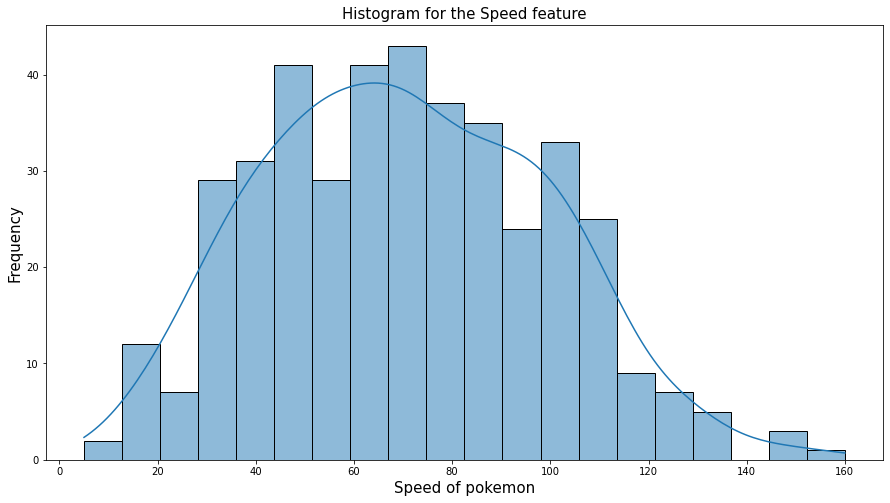

Mean, Median and Mode of 'Speed' feature are 70.514, 70.0 and 27 respectively.

Upperbound Outliers that exist in 'Speed' feature is [160]


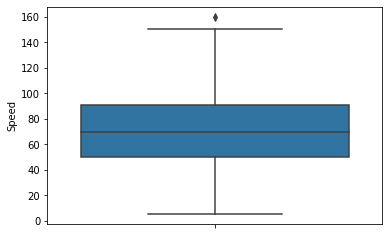

In [11]:
#Assumption: The dataset without null values (i.e., 414 rows) are to be considered as an i/p for the below calculations

#Setting the size of the visual / figure
plt.figure(figsize = (15,8))

#Plotting the range and frequency of each pokemon's speed in the form of histogram
sns.histplot(df_pokemon_no_null_values['Speed'],kde=True,bins=20)

#Setting up the title and labels of the visual
plt.title('Histogram for the Speed feature', fontsize = 15)
plt.xlabel('Speed of pokemon', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

#Displaying the visual
plt.show()

#Calculating the mean, median and mode of the "Speed" feature
print("Mean, Median and Mode of 'Speed' feature are {0}, {1} and {2} respectively.".
      format(round(df_pokemon_no_null_values['Speed'].mean(),3),
             df_pokemon_no_null_values['Speed'].median(),
             df_pokemon_no_null_values['Speed'].value_counts().tolist()[0]))

#Calculating the upperbound values under the "Speed" feature
df_pokemon_Speed_UB = (df_pokemon_no_null_values['Speed'].quantile(.75) + 
      1.5 * (df_pokemon_no_null_values['Speed'].quantile(.75) - df_pokemon_no_null_values['Speed'].quantile(.25)))

#Identifying the upperbound outiers under the "Speed" features and printing them
df_pokemon_Speed_UB_outlier = list(df_pokemon_no_null_values['Speed'][df_pokemon_no_null_values['Speed'] > 
                                                                         df_pokemon_Speed_UB])
print("\nUpperbound Outliers that exist in 'Speed' feature is",df_pokemon_Speed_UB_outlier)

#Displaying the 'Speed' feature from the dataset using the boxplot visual to highlight the outlier
sns.boxplot(y=df_pokemon_no_null_values["Speed"])
plt.show()

#### Inferences on the Pokemon's "Speed" feature from the Histogram:
<br>1. Minimum speed of pokemon is 5 (for Shuckle) and the max is 160 (for Ninjask)
<br><br>2. Speed of majority of the pokemons are between 60 and 80, as it is rightly denoted by the <b>Mean (i.e., 70.514)</b>
<br><br>3. Speed of pokemons has <b>1 upperbound outlier</b> (i.e., Ninjask - 160), as it is greater than 152.5 (i.e., Q3 + 1.5 * IQR).
<br><br>4. As the <b>Mean > Median > Mode</b> (i.e., 70.514 > 70 > 27), the data are positively or right-skewed and has longer right tail distribution.
<br><br>5. The data looks <b>fairly symmetrical</b> as the skewness (0.209) is between the range of -0.5 to 0.5.